### breast_cancer做PCA練習

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
bc = load_breast_cancer()

In [5]:
x = bc.data
y = bc.target

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
X = pca.transform(x)

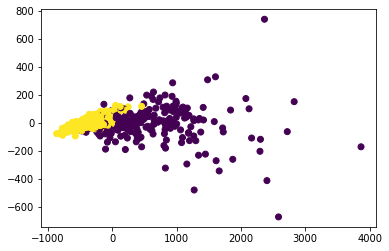

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=0)

In [13]:
from sklearn.svm import SVC

In [20]:
clf = SVC()


In [22]:
clf.fit(x_train,y_train)

/Users/nini/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
y_predict = clf.predict(x_test)

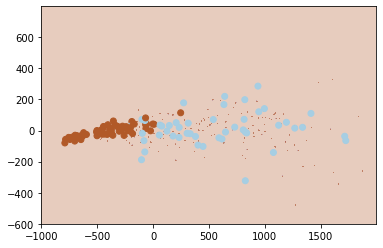

In [18]:
x0 = np.arange(-1000,2000,1)
y0 = np.arange(-600,800,1)

xm,ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap='Paired')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='Paired')